#### Rudrendu Paul, MBA+MS (Analytics), Boston University (May, 2019)

## Bank Marketing Case

#### Overview: 

The data set (bank-additional-full.csv) consists of demographics data on 41,188 people.

The target variable is y (column # 21) - whether the clients have responded 'yes' or 'no' to term deposit.

Steps:
1. data exploration
2. feature (variable) selection (statistical tests used: difference of mean and chi square test)
3. converting the categorical variables to dummy variables for model predictions
4. data split into training & test sets in 80-20 ratio
5. multiple machine learning models trained on training dataset
6. AUC score & other accuracy metrics calculated on the test set
7. Best selected on the basis of test set AUC score
8. Lift calculated based on the rank scored probabilities of each person in test set
9. Business case formulated (assuming some cost and revenue parameters) on how well the model performs better than the baseline (marketing to everyone on the list)

#### Snapshot of business case: 

Assumptions: 
1) Cost of mailing to each person is USD 2

2) Revenue per person who responds positively to marketing campaign is USD 10.

##### Model performance vs baseline

Average response rate of people on list is 11 % (baseline) and hence, marketing to each person on the list incurs a loss of $ 6,938 with a ROI of negative 45 % (baseline).

Marketing to new list of people with high probability of conversion identified by the best machine learning model, improves response rate to 36 % (performance of best model), 3.5X average  lift over the baseline average response rate of 11 % and hence improves ROI from -45 % (baseline) to 79 % (best model).

#### Importing Libraries

In [1]:
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import scipy.stats as stats

%matplotlib inline
plt.style.use("ggplot")

# Multiple Output display
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#### Marketing campaign dataset

Source: https://archive.ics.uci.edu/ml/datasets/bank+marketing

In [2]:
dataset = pd.read_csv('bank-additional-full.csv', delimiter = ";")
dataset.shape
dataset.head(10)

(41188, 21)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


#### Exploring the distribution of output (predictor) variable

Text(0.5,1,'yes/no (overall)')

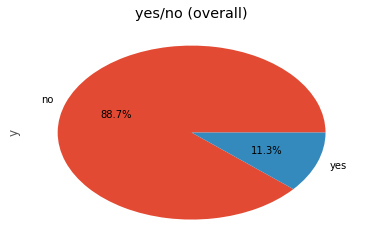

In [3]:
f = plt.figure(figsize=(6,4))

plt.title('yes/no (overall)')
dataset["y"].value_counts().plot(kind = "pie", autopct='%1.1f%%')
plt.savefig('overall_repsonse.png', dpi=80)

#### Analysis: 

Average response rate is 11.3 %.

### Exploring the model input variables

#### Age

Text(0.5,1,'age (overall)')

Text(0.5,1,'age (yes)')

Text(0.5,1,'age (no)')

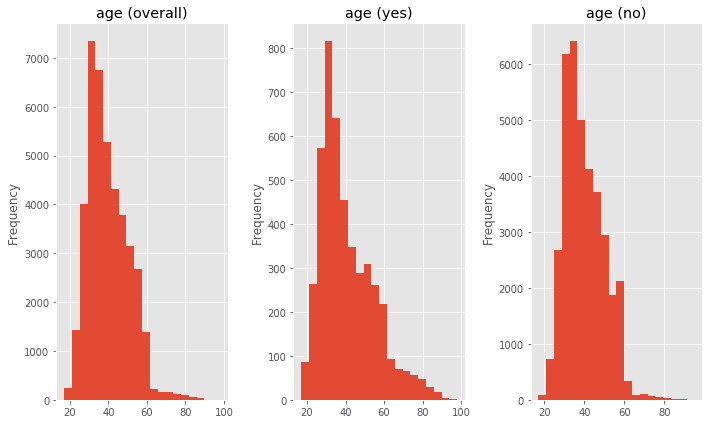

In [4]:
f = plt.figure(figsize=(10,6))

plt.subplot(131)
plt.title('age (overall)')
Output = None
dataset["age"].plot(kind = "hist", bins = 20)

plt.subplot(132)
plt.title('age (yes)')
dataset["age"][dataset["y"] == "yes"].plot(kind = "hist", bins = 20)

plt.subplot(133)
plt.title('age (no)')
dataset["age"][dataset["y"] == "no"].plot(kind = "hist", bins = 20)
plt.tight_layout()

plt.savefig('age_distribution.png', dpi=1000)

#### Difference of mean test on Age (yes) and Age (No)

In [5]:
dataset_age_yes = dataset["age"][dataset["y"] == "yes"]
dataset_age_no = dataset["age"][dataset["y"] == "no"]

rows_yes = dataset_age_yes.shape[0]
rows_no = dataset_age_no.shape[0]

mean_age_yes = np.mean(dataset_age_yes)
mean_age_no = np.mean(dataset_age_no)

std_dev_age_yes = np.std(dataset_age_yes)
std_dev_age_no = np.std(dataset_age_no)


std_error = (std_dev_age_yes**2/rows_yes + std_dev_age_no**2/rows_no)**0.5
Difference_mean = mean_age_yes - mean_age_no

Upper_bound_95_confidence_Interval = round(Difference_mean + 1.96*std_error, 3)
Lower_bound_95_confidence_Interval = round(Difference_mean - 1.96*std_error, 3)
print("The 95% confidence interval of the difference of means is [", Lower_bound_95_confidence_Interval, ", ", Upper_bound_95_confidence_Interval, "]")

The 95% confidence interval of the difference of means is [ 0.591 ,  1.413 ]


##### Analysis: 

Difference of the mean of Age is statistically significant at 95% confidence interval because the 95% confidence interval does not include 0.

##### Job

Text(0.5,1,'% Job (overall)')

Text(0.5,1,'% Job (no)')

Text(0.5,1,'% Job (yes)')

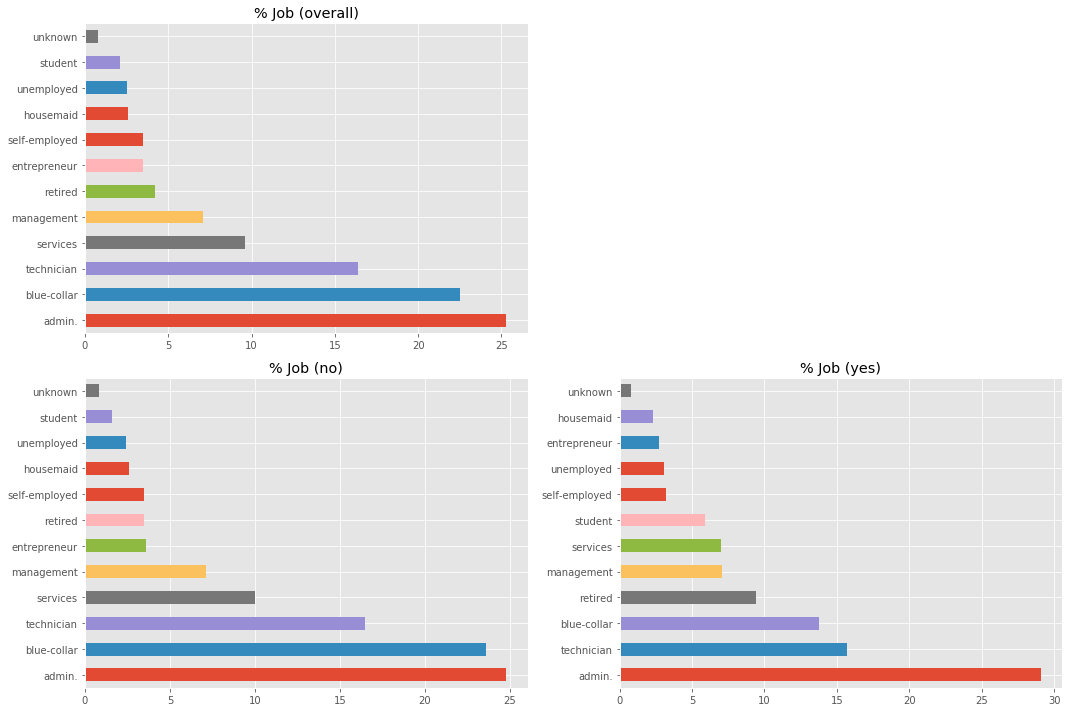

In [6]:
f = plt.figure(figsize=(15,10))

plt.subplot(221)
plt.title('% Job (overall)')
jobs_dist = dataset["job"].value_counts()
jobs_overall = round(jobs_dist/(jobs_dist.sum())*100,1)
jobs_overall.plot(kind = "barh")

plt.subplot(223)
plt.title('% Job (no)')
jobs_dist_no = dataset["job"][dataset["y"] == "no"].value_counts()
jobs_no = round(jobs_dist_no/(jobs_dist_no.sum())*100,1)
jobs_no.plot(kind = "barh")

plt.subplot(224)
plt.title('% Job (yes)')
jobs_dist_yes = dataset["job"][dataset["y"] == "yes"].value_counts()
jobs_yes = round(jobs_dist_yes/(jobs_dist_yes.sum())*100,1)
jobs_yes.plot(kind = "barh")

plt.savefig('job.png', dpi=1000)

plt.tight_layout()

#### Chi square test on job category

In [7]:
job_yes = dataset["job"][dataset["y"] == "yes"].value_counts()
job_yes
job_no = dataset["job"][dataset["y"] == "no"].value_counts()
job_no

job_yes_arranged = [job_yes["admin."], job_yes["technician"], job_yes["blue-collar"], job_yes["retired"], job_yes["management"], job_yes["services"],
job_yes["student"], job_yes["self-employed"], job_yes["unemployed"], job_yes["entrepreneur"], job_yes["housemaid"]]

job_no_arranged = [job_no["admin."], job_no["technician"], job_no["blue-collar"], job_no["retired"], job_no["management"], job_no["services"],
job_no["student"], job_no["self-employed"], job_no["unemployed"], job_no["entrepreneur"], job_no["housemaid"]]
                                                      
obs = np.array([job_yes_arranged, job_no_arranged])
obs
chi2, p, dof, expected = stats.chi2_contingency(obs)
print("p value of chi-square test: ", p)

admin.           1352
technician        730
blue-collar       638
retired           434
management        328
services          323
student           275
self-employed     149
unemployed        144
entrepreneur      124
housemaid         106
unknown            37
Name: job, dtype: int64

admin.           9070
blue-collar      8616
technician       6013
services         3646
management       2596
entrepreneur     1332
retired          1286
self-employed    1272
housemaid         954
unemployed        870
student           600
unknown           293
Name: job, dtype: int64

array([[1352,  730,  638,  434,  328,  323,  275,  149,  144,  124,  106],
       [9070, 6013, 8616, 1286, 2596, 3646,  600, 1272,  870, 1332,  954]],
      dtype=int64)

p value of chi-square test:  4.232405679993378e-200


#### Analysis: 

The chi square test shows that job is statistically significant at 95% confidence interval is whether people responded yes or no to the marketing campaign as the p value of the chi square is less than 5 %.

From the chart shown above for the proportion of each job type in each groups, for people with the following job types had a higher % of responding "yes" than those who responded "no", 

1. Admin jobs,
2. Retired 
3. Students.

##### Marital Status

Text(0.5,1,'marital (overall)')

Text(0.5,1,'marital (yes)')

Text(0.5,1,'marital (no)')

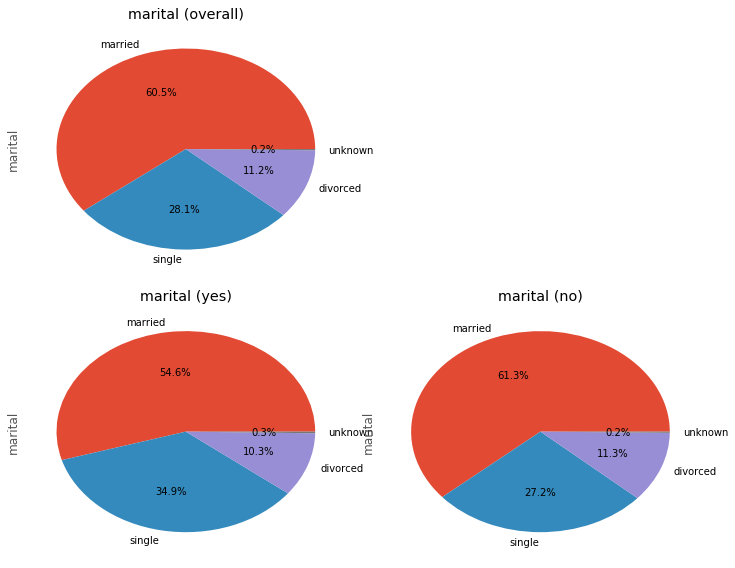

In [8]:
f = plt.figure(figsize=(10,8))

plt.subplot(221)
plt.title('marital (overall)')
dataset["marital"].value_counts().plot(kind = "pie", autopct='%1.1f%%')

plt.subplot(223)
plt.title('marital (yes)')
dataset["marital"][dataset["y"] == "yes"].value_counts().plot(kind = "pie", autopct='%1.1f%%')

ax2 = plt.subplot(224)
plt.title('marital (no)')
dataset["marital"][dataset["y"] == "no"].value_counts().plot(kind = "pie", autopct='%1.1f%%')
plt.tight_layout()



In [9]:
pd.DataFrame

pandas.core.frame.DataFrame

#### Chi square test on marital status

In [10]:
marital_yes = dataset["marital"][dataset["y"] == "yes"].value_counts()
marital_yes
marital_no = dataset["marital"][dataset["y"] == "no"].value_counts()
marital_no

marital_yes_arranged = [marital_yes["single"], marital_yes["married"], marital_yes["divorced"]]

marital_no_arranged = [marital_no["single"], marital_no["married"], marital_no["divorced"]]

obs = np.array([marital_yes_arranged, marital_no_arranged])
obs
chi2, p, dof, expected = stats.chi2_contingency(obs)
print("p value of chi-square test: ", p)

married     2532
single      1620
divorced     476
unknown       12
Name: marital, dtype: int64

married     22396
single       9948
divorced     4136
unknown        68
Name: marital, dtype: int64

array([[ 1620,  2532,   476],
       [ 9948, 22396,  4136]], dtype=int64)

p value of chi-square test:  3.924141589479533e-27


##### Analysis: 

Chi-square test reveals that marital status is statistically significant at 95% confidence interval as the p value is less than 5 %. 

We can see from the charts above that "singles" are on average more likely to positively respond to the campaign than those married or divorced. 

##### Education level

Text(0.5,1,'% education (overall distribution)')

Text(0.5,1,'% education (yes)')

Text(0.5,1,'% education (no)')

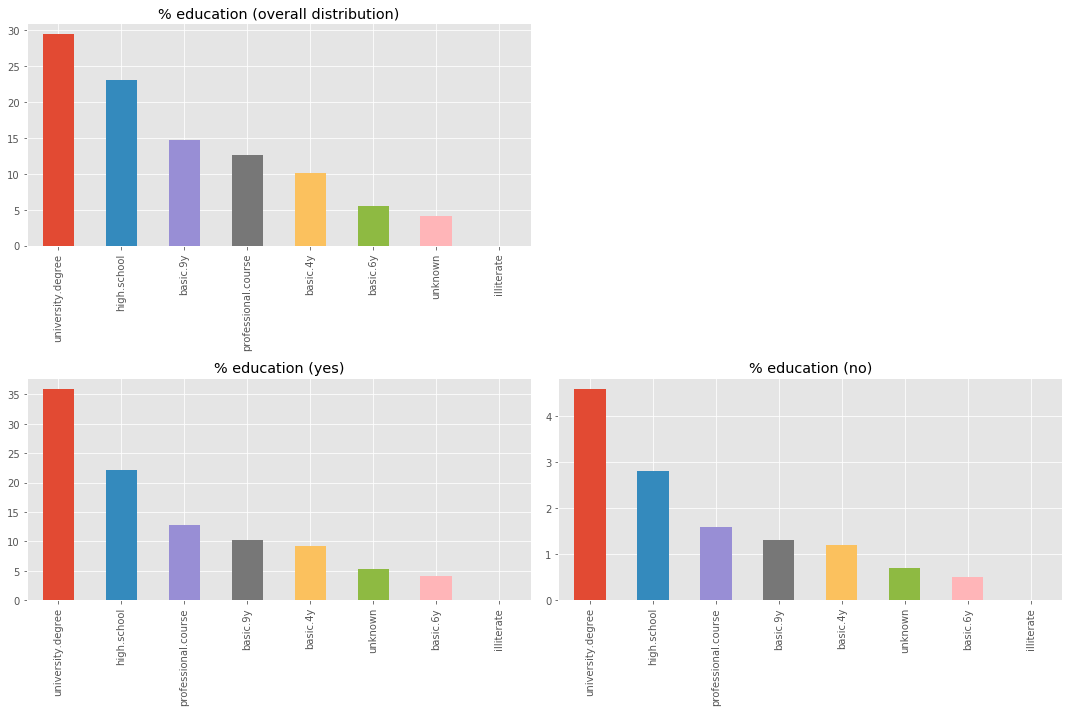

In [11]:
f = plt.figure(figsize=(15,10))

plt.subplot(221)
plt.title('% education (overall distribution)')
Total_counts = dataset["education"].value_counts()
Edu = round(Total_counts/(Total_counts.sum())*100,1)
Edu.plot(kind = "bar")

plt.subplot(223)
plt.title('% education (yes)')
Total_counts_yes = dataset["education"][dataset["y"] == "yes"].value_counts()
Edu_yes = round(Total_counts_yes/(Total_counts_yes.sum())*100,1)
Edu_yes.plot(kind = "bar")

plt.subplot(224)
plt.title('% education (no)')
Total_counts_no = dataset["education"][dataset["y"] == "no"].value_counts()
Edu_no = round(Total_counts_yes/(Total_counts_no.sum())*100,1)
Edu_no.plot(kind = "bar")

plt.savefig('education.png', dpi=1000)

plt.tight_layout()

#### % of poeple with higher education in each of those who responded with "yes" vs. those with "no"


In [12]:
print("% Education_yes")
Edu_yes

print("% Education_no")
Edu_no

% Education_yes


university.degree      36.0
high.school            22.2
professional.course    12.8
basic.9y               10.2
basic.4y                9.2
unknown                 5.4
basic.6y                4.1
illiterate              0.1
Name: education, dtype: float64

% Education_no


university.degree      4.6
high.school            2.8
professional.course    1.6
basic.9y               1.3
basic.4y               1.2
unknown                0.7
basic.6y               0.5
illiterate             0.0
Name: education, dtype: float64

#### Chi square test on education

In [13]:
education_yes = dataset["education"][dataset["y"] == "yes"].value_counts()
education_yes
education_no = dataset["education"][dataset["y"] == "no"].value_counts()
education_no

education_yes_arranged = [education_yes["university.degree"], education_yes["high.school"], education_yes["professional.course"], education_yes["basic.9y"], education_yes["basic.6y"], education_yes["basic.4y"], education_yes["illiterate"]]

education_no_arranged = [education_no["university.degree"], education_no["high.school"], education_no["professional.course"], education_no["basic.9y"], education_no["basic.6y"], education_no["basic.4y"], education_no["illiterate"]]

obs = np.array([education_yes_arranged, education_no_arranged])
obs
chi2, p, dof, expected = stats.chi2_contingency(obs)
print("p value of chi-square test: ", p)

university.degree      1670
high.school            1031
professional.course     595
basic.9y                473
basic.4y                428
unknown                 251
basic.6y                188
illiterate                4
Name: education, dtype: int64

university.degree      10498
high.school             8484
basic.9y                5572
professional.course     4648
basic.4y                3748
basic.6y                2104
unknown                 1480
illiterate                14
Name: education, dtype: int64

array([[ 1670,  1031,   595,   473,   188,   428,     4],
       [10498,  8484,  4648,  5572,  2104,  3748,    14]], dtype=int64)

p value of chi-square test:  2.2494049169426562e-35


#### Analysis: 

The chi square test reveals that education level is statistically significant at 95% confidence interval as p value is less than 5 %. From the chart above, those who responded "yes" had a much higher proportion of people with higher education 
(university.degree, high.school & professional.course) than those who responded "no".

##### Default on past loans

Text(0.5,1,'default (overall)')

Text(0.5,1,'default (yes)')

Text(0.5,1,'default (no)')

Distribution of variables in loan default: 


no         32588
unknown     8597
yes            3
Name: default, dtype: int64

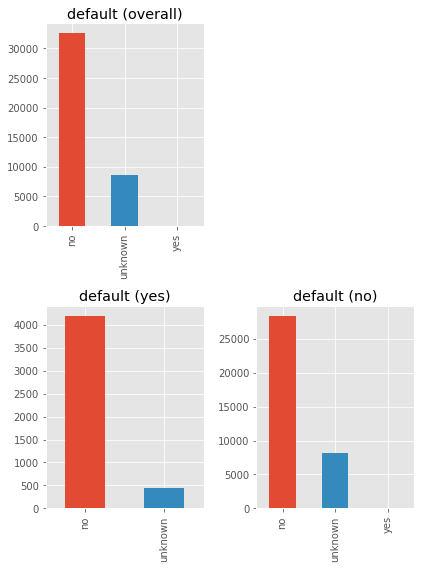

In [14]:
f = plt.figure(figsize=(6,8))

plt.subplot(221)
plt.title('default (overall)')
dataset["default"].value_counts().plot(kind = "bar")

plt.subplot(223)
plt.title('default (yes)')
dataset["default"][dataset["y"] == "yes"].value_counts().plot(kind = "bar")

plt.subplot(224)
plt.title('default (no)')
dataset["default"][dataset["y"] == "no"].value_counts().plot(kind = "bar")
plt.tight_layout()

print("Distribution of variables in loan default: ")
dataset["default"].value_counts()

#### Analysis: 

We can drop the Loan default variable as it does not add any new information to our models. From the above table and the plots, it is observed that the most of the values are either "no" or "unknown" ie, missing. Only 3 people in the entire dataset of 41,188 have defaulted in their previous loans.  

#### Housing

Text(0.5,1,'housing (overall)')

Text(0.5,1,'housing (yes)')

Text(0.5,1,'housing (no)')

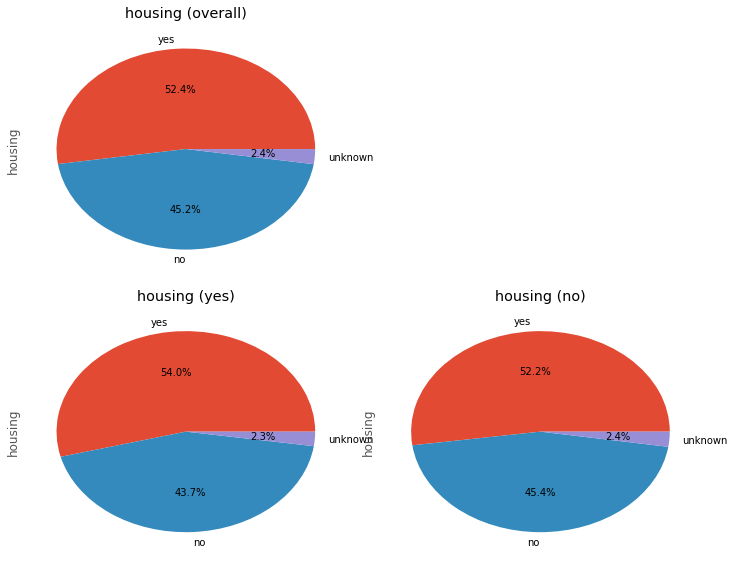

In [15]:
f = plt.figure(figsize=(10,8))

plt.subplot(221)
plt.title('housing (overall)')
dataset["housing"].value_counts().plot(kind = "pie", autopct='%1.1f%%')

plt.subplot(223)
plt.title('housing (yes)')
dataset["housing"][dataset["y"] == "yes"].value_counts().plot(kind = "pie", autopct='%1.1f%%')

plt.subplot(224)
plt.title('housing (no)')
dataset["housing"][dataset["y"] == "no"].value_counts().plot(kind = "pie", autopct='%1.1f%%')
plt.tight_layout()

#### Chi square test on housing

In [16]:
housing_yes = dataset["housing"][dataset["y"] == "yes"].value_counts()
housing_yes
housing_no = dataset["housing"][dataset["y"] == "no"].value_counts()
housing_no

housing_yes_arranged = [housing_yes["yes"], housing_yes["no"]]

housing_no_arranged = [housing_no["yes"], housing_no["no"]]

obs = np.array([education_yes_arranged, education_no_arranged])
obs
chi2, p, dof, expected = stats.chi2_contingency(obs)
print("p value of chi-square test: ", p)

yes        2507
no         2026
unknown     107
Name: housing, dtype: int64

yes        19069
no         16596
unknown      883
Name: housing, dtype: int64

array([[ 1670,  1031,   595,   473,   188,   428,     4],
       [10498,  8484,  4648,  5572,  2104,  3748,    14]], dtype=int64)

p value of chi-square test:  2.2494049169426562e-35


#### Analysis:

The chi square test reveals that housing is statistically significant at 95% confidence interval as p value is less than 5 %.

##### Personal Loan

Text(0.5,1,'loan (overall)')

Text(0.5,1,'loan (yes)')

Text(0.5,1,'loan (no)')

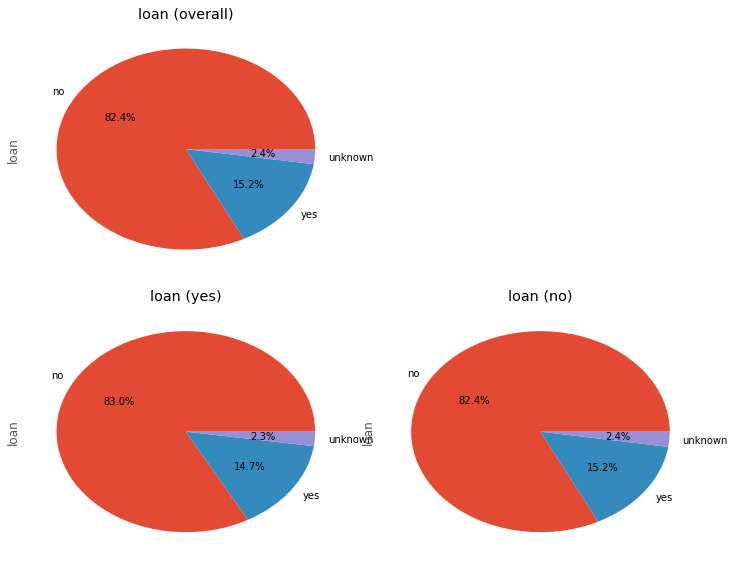

In [17]:
f = plt.figure(figsize=(10,8))

plt.subplot(221)
plt.title('loan (overall)')
dataset["loan"].value_counts().plot(kind = "pie", autopct='%1.1f%%')

plt.subplot(223)
plt.title('loan (yes)')
dataset["loan"][dataset["y"] == "yes"].value_counts().plot(kind = "pie", autopct='%1.1f%%')

plt.subplot(224)
plt.title('loan (no)')
dataset["loan"][dataset["y"] == "no"].value_counts().plot(kind = "pie", autopct='%1.1f%%')
plt.tight_layout()

#### Chi square test on personal loans

In [18]:
loan_yes = dataset["loan"][dataset["y"] == "yes"].value_counts()
loan_yes
loan_no = dataset["loan"][dataset["y"] == "no"].value_counts()
loan_no

loan_yes_arranged = [loan_yes["yes"], loan_yes["no"]]

loan_no_arranged = [loan_no["yes"], loan_no["no"]]

obs = np.array([loan_yes_arranged, loan_no_arranged])
obs
chi2, p, dof, expected = stats.chi2_contingency(obs)
print("p value of chi-square test: ", p)

no         3850
yes         683
unknown     107
Name: loan, dtype: int64

no         30100
yes         5565
unknown      883
Name: loan, dtype: int64

array([[  683,  3850],
       [ 5565, 30100]], dtype=int64)

p value of chi-square test:  0.35921398426348206


#### Analysis:

Loan variable shall be dropped as it does not add any additional information. The p value of chi-square test is greater than 0.05, hence it is not statistically significant at 95% confidence level.

##### Contact

Text(0.5,1,'contact (overall)')

Text(0.5,1,'contact (yes)')

Text(0.5,1,'contact (no)')

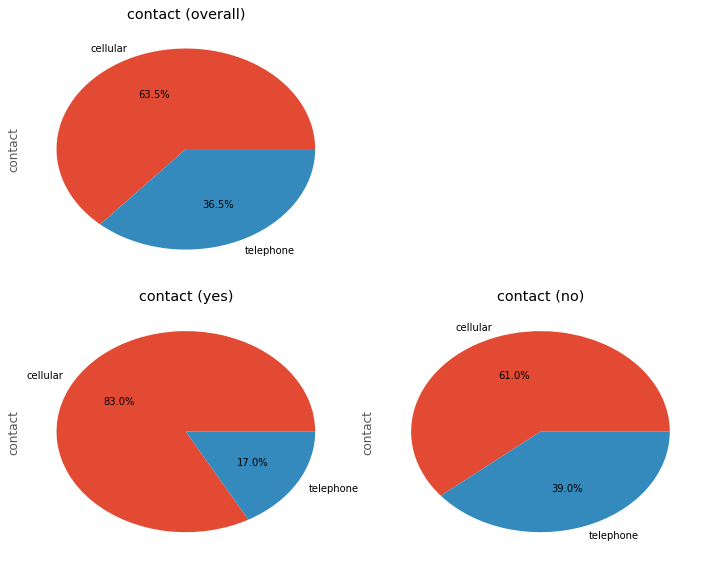

In [19]:
f = plt.figure(figsize=(10,8))

plt.subplot(221)
plt.title('contact (overall)')
dataset["contact"].value_counts().plot(kind = "pie", autopct='%1.1f%%')

plt.subplot(223)
plt.title('contact (yes)')
dataset["contact"][dataset["y"] == "yes"].value_counts().plot(kind = "pie", autopct='%1.1f%%')

plt.subplot(224)
plt.title('contact (no)')
dataset["contact"][dataset["y"] == "no"].value_counts().plot(kind = "pie", autopct='%1.1f%%')
plt.tight_layout()

#### Chi square test on contact communication type

In [20]:
contact_yes = dataset["contact"][dataset["y"] == "yes"].value_counts()
contact_yes
contact_no = dataset["contact"][dataset["y"] == "no"].value_counts()
contact_no

obs = np.array([contact_yes, contact_no])
obs
chi2, p, dof, expected = stats.chi2_contingency(obs)
print("p value of chi-square test: ", p)

cellular     3853
telephone     787
Name: contact, dtype: int64

cellular     22291
telephone    14257
Name: contact, dtype: int64

array([[ 3853,   787],
       [22291, 14257]], dtype=int64)

p value of chi-square test:  1.5259856523129964e-189


##### Analysis: 

Contact (communication type is statistically significant at 95% confidence interval from chi squeare test. Also, from the above charts, it can be concluded that a people who were contacted by cell phone, higher prportion of them responded more positively to the campaign.

##### Month

Text(0.5,1,'% month (overall)')

Text(0.5,1,'% month (no)')

Text(0.5,1,'% month (yes)')

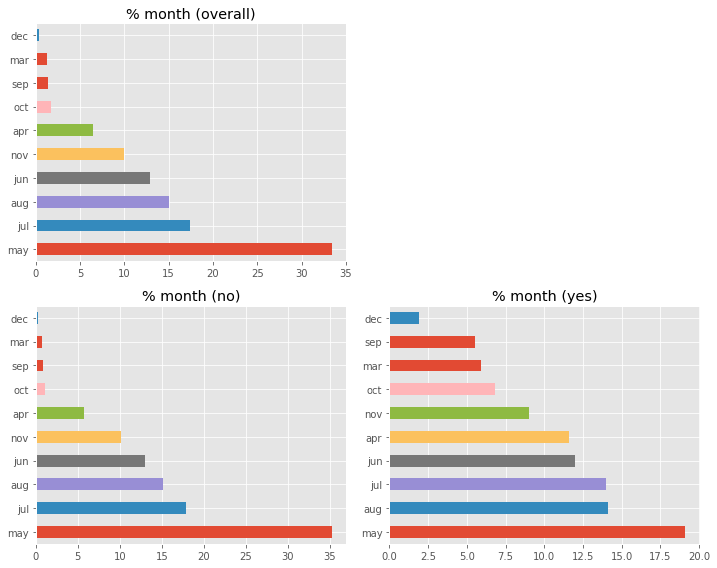

In [21]:
f = plt.figure(figsize=(10,8))
plt.subplot(221)
plt.title('% month (overall)')
month_contact_overall = dataset["month"].value_counts()
month_overall = round(month_contact_overall/(month_contact_overall.sum())*100,1)
month_overall.plot(kind = "barh")

plt.subplot(223)
plt.title('% month (no)')
month_contact_no = dataset["month"][dataset["y"] == "no"].value_counts()
month_no = round(month_contact_no/(month_contact_no.sum())*100,1)
month_no.plot(kind = "barh")


plt.subplot(224)
plt.title('% month (yes)')
month_contact_yes = dataset["month"][dataset["y"] == "yes"].value_counts()
month_yes = round(month_contact_yes/(month_contact_yes.sum())*100,1)
month_yes.plot(kind = "barh")

plt.tight_layout()

#### Chi square test on month contacted

In [22]:
month_yes = dataset["month"][dataset["y"] == "yes"].value_counts()
month_yes
month_no = dataset["month"][dataset["y"] == "no"].value_counts()
month_no

month_yes_arranged = [month_yes["may"], month_yes["aug"], month_yes["jul"], month_yes["jun"], month_yes["apr"], month_yes["nov"], month_yes["oct"], month_yes["mar"], month_yes["sep"], month_yes["dec"]]

month_no_arranged = [month_no["may"], month_no["aug"], month_no["jul"], month_no["jun"], month_no["apr"], month_no["nov"], month_no["oct"], month_yes["mar"], month_no["sep"], month_no["dec"]]

obs = np.array([month_yes_arranged, month_no_arranged])
obs
chi2, p, dof, expected = stats.chi2_contingency(obs)
print("p value of chi-square test: ", p)

may    886
aug    655
jul    649
jun    559
apr    539
nov    416
oct    315
mar    276
sep    256
dec     89
Name: month, dtype: int64

may    12883
jul     6525
aug     5523
jun     4759
nov     3685
apr     2093
oct      403
sep      314
mar      270
dec       93
Name: month, dtype: int64

array([[  886,   655,   649,   559,   539,   416,   315,   276,   256,
           89],
       [12883,  5523,  6525,  4759,  2093,  3685,   403,   276,   314,
           93]], dtype=int64)

p value of chi-square test:  0.0


##### Day_of_week

Text(0.5,1,'% day_of_week (overall)')

Text(0.5,1,'% day_of_week (no)')

Text(0.5,1,'% day_of_week (yes)')

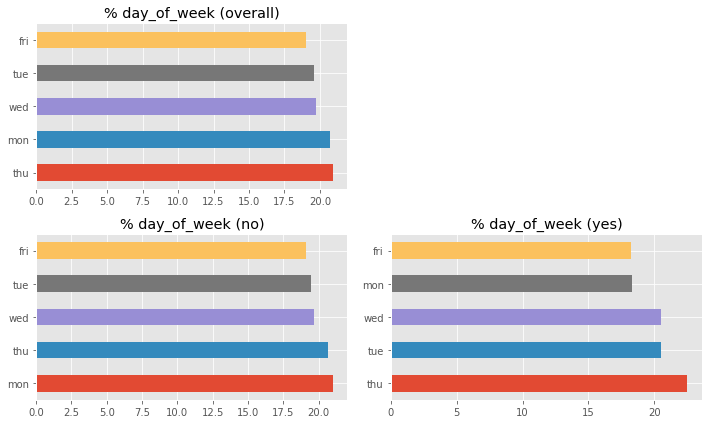

In [23]:
f = plt.figure(figsize=(10,6))

plt.subplot(221)
plt.title('% day_of_week (overall)')
day_of_week_overall = dataset["day_of_week"].value_counts()
day_of_week_overall = round(day_of_week_overall/(day_of_week_overall.sum())*100,1)
day_of_week_overall.plot(kind = "barh")

plt.subplot(223)
plt.title('% day_of_week (no)')
day_of_week_no = dataset["day_of_week"][dataset["y"] == "no"].value_counts()
day_of_week_no = round(day_of_week_no/(day_of_week_no.sum())*100,1)
day_of_week_no.plot(kind = "barh")


plt.subplot(224)
plt.title('% day_of_week (yes)')
day_of_week_yes = dataset["day_of_week"][dataset["y"] == "yes"].value_counts()
day_of_week_yes = round(day_of_week_yes/(day_of_week_yes.sum())*100,1)
day_of_week_yes.plot(kind = "barh")

plt.tight_layout()

#### Chi square test on day of week contacted

In [24]:
day_of_week_yes = dataset["day_of_week"][dataset["y"] == "yes"].value_counts()
day_of_week_yes
day_of_week_no = dataset["day_of_week"][dataset["y"] == "no"].value_counts()
day_of_week_no

day_of_week_yes_arranged = [day_of_week_yes["mon"], day_of_week_yes["tue"], day_of_week_yes["wed"], day_of_week_yes["thu"], day_of_week_yes["fri"]]
day_of_week_no_arranged = [day_of_week_no["mon"], day_of_week_no["tue"], day_of_week_no["wed"], day_of_week_no["thu"], day_of_week_no["fri"]]

obs = np.array([day_of_week_yes_arranged, day_of_week_no_arranged])
obs
chi2, p, dof, expected = stats.chi2_contingency(obs)
print("p value of chi-square test: ", p)

thu    1045
tue     953
wed     949
mon     847
fri     846
Name: day_of_week, dtype: int64

mon    7667
thu    7578
wed    7185
tue    7137
fri    6981
Name: day_of_week, dtype: int64

array([[ 847,  953,  949, 1045,  846],
       [7667, 7137, 7185, 7578, 6981]], dtype=int64)

p value of chi-square test:  2.9584820052785324e-05


##### Analysis: 

Day of week contacted is statistically significant at 95% confidence interval from chi squeare test as p value is less than 5 %. 

From the above charts, Thursday, Tuesday and Wednesday had a higher proportion of positive response.

##### Duration

Text(0.5,1,'duration (overall)')

Text(0.5,1,'duration (yes)')

Text(0.5,1,'duration (no)')

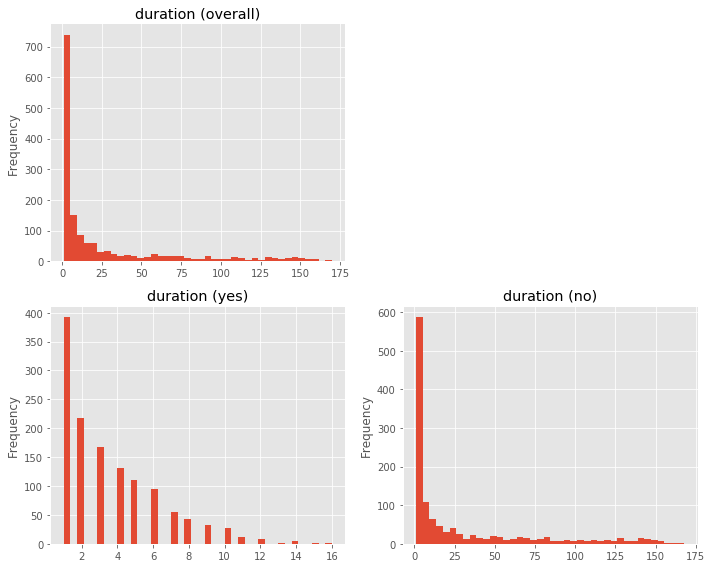

In [25]:
f = plt.figure(figsize=(10,8))

plt.subplot(221)
plt.title('duration (overall)')
dataset["duration"].value_counts().plot(kind = "hist", bins = 40)

plt.subplot(223)
plt.title('duration (yes)')
dataset["duration"][dataset["y"] == "yes"].value_counts().plot(kind = "hist", bins = 40)

plt.subplot(224)
plt.title('duration (no)')
dataset["duration"][dataset["y"] == "no"].value_counts().plot(kind = "hist", bins = 40)
plt.tight_layout()

#### Analysis: 

On average default rate was lower among people who responded positively, note the long tail in "duration (no)".

The call duration variable could not be known ahead of the call. Hence, this variable needs to be dropped for predictive purposes. 

##### Campaign

Text(0.5,1,'% campaign (overall)')

Text(0.5,1,'% campaign (yes)')

Text(0.5,1,'% campaign (no)')

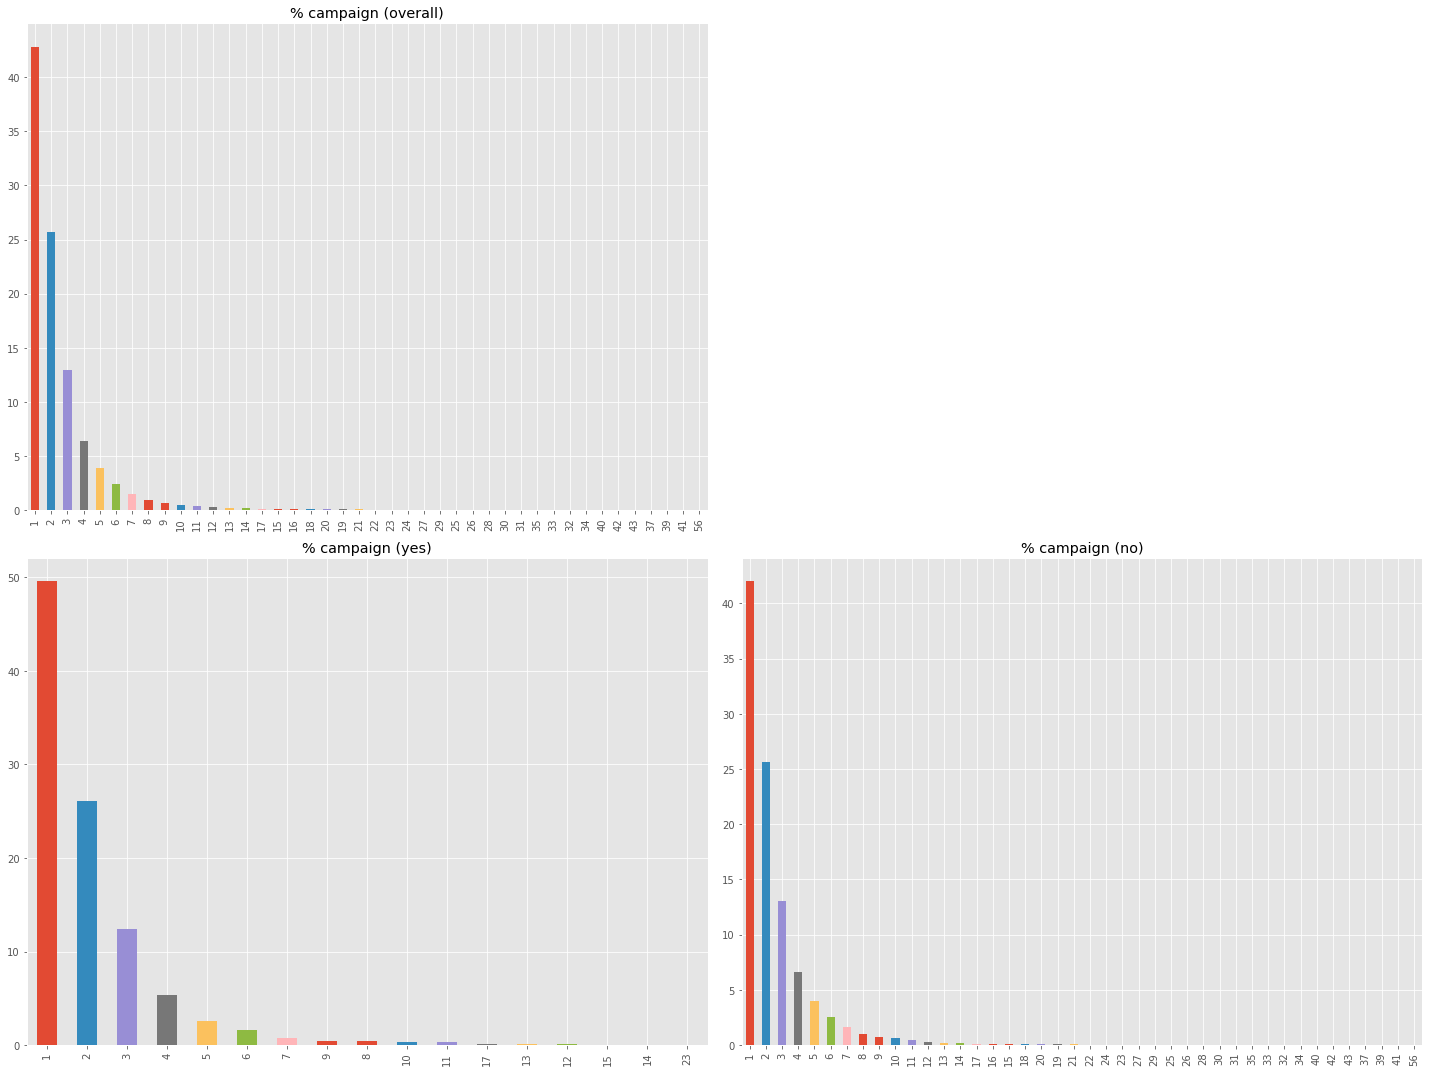

In [26]:
f = plt.figure(figsize=(20,15))

plt.subplot(221)
plt.title('% campaign (overall)')
campaign_overall_contact = dataset["campaign"].value_counts()
campaign_overall = round(campaign_overall_contact /(campaign_overall_contact.sum())*100,1)
campaign_overall.plot(kind = "bar")

plt.subplot(223)
plt.title('% campaign (yes)')
campaign_yes_contact = dataset["campaign"][dataset["y"] == "yes"].value_counts()
campaign_yes = round(campaign_yes_contact /(campaign_yes_contact.sum())*100,1)
campaign_yes.plot(kind = "bar")

plt.subplot(224)
plt.title('% campaign (no)')
campaign_no_contact = dataset["campaign"][dataset["y"] == "no"].value_counts()
campaign_no = round(campaign_no_contact /(campaign_no_contact.sum())*100,1)
campaign_no.plot(kind = "bar")

plt.tight_layout()

#### Applying Difference of mean test on campaigns (# of contacts with clients)

In [27]:
campaign_yes = dataset["campaign"][dataset["y"] == "yes"]
campaign_yes = dataset["campaign"][dataset["y"] == "no"]

rows_yes = campaign_yes.shape[0]
rows_no = campaign_no.shape[0]

mean_campaign_yes = np.mean(campaign_yes)
mean_campaign_no = np.mean(campaign_no)

std_dev_campaign_yes = np.std(campaign_yes)
std_dev_campaign_no = np.std(campaign_no)

std_error = (std_dev_campaign_yes**2/rows_yes + std_dev_campaign_no**2/rows_no)**0.5
Difference_mean = mean_campaign_yes - mean_campaign_no


Upper_bound_95_confidence_Interval = round(Difference_mean + 1.96*std_error, 3)
Lower_bound_95_confidence_Interval = round(Difference_mean - 1.96*std_error, 3)

print("The 95% confidence interval of the difference of means is [", Lower_bound_95_confidence_Interval, ", ", Upper_bound_95_confidence_Interval, "]")

The 95% confidence interval of the difference of means is [ -2.033 ,  2.562 ]


#### Analysis: 
     
"#" of Campaign contact is not statistically significant at 95% confidence interval as the 95% confidence interval includes 0. 

#### Client last contacted (pdays)

Number of different values in pdays (overall):  27
% of clients (overall) never contacted before:  96.3  %
Number of different values in pdays (yes):  26
% of clients (yes) never contacted before:  79.2  %
Number of different values in pdays (no):  23
% of clients (no) never contacted before:  98.5  %


Text(0.5,1,'pdays (overall)')

Text(0.5,1,'pdays (yes)')

Text(0.5,1,'pdays (no)')

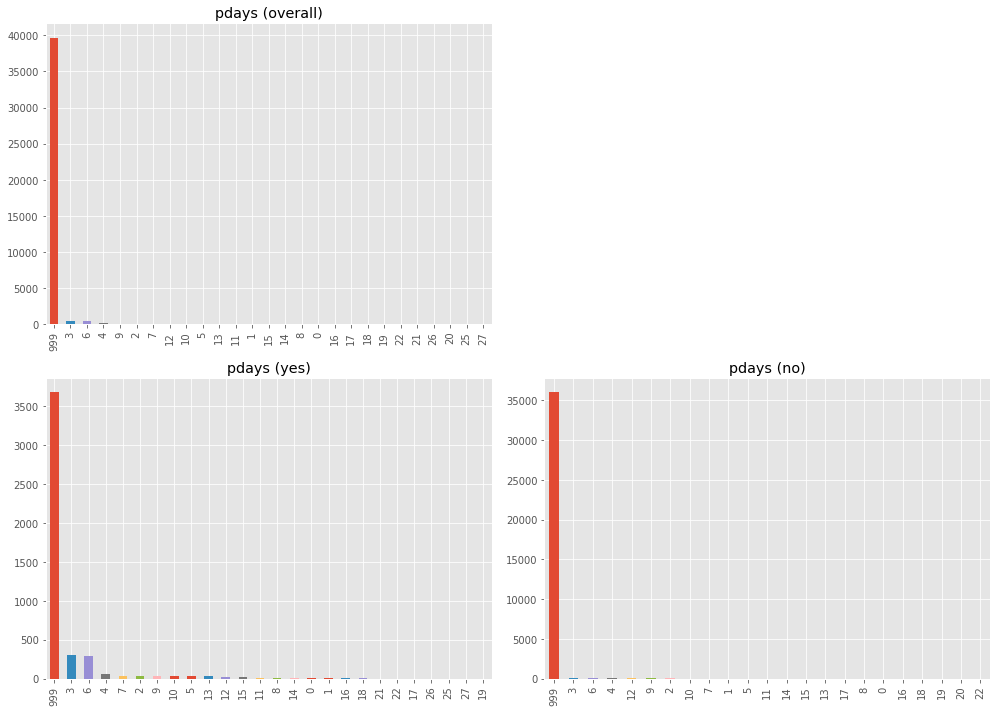

In [28]:
f = plt.figure(figsize=(14,10))

pdays_overall = dataset["pdays"].value_counts()
print("Number of different values in pdays (overall): ", pdays_overall.shape[0])
pdays_overall_999 =  round(pdays_overall[999]/(pdays_overall.sum())*100, 1)
print("% of clients (overall) never contacted before: ", pdays_overall_999, " %")

pdays_yes = dataset["pdays"][dataset["y"] == "yes"].value_counts()
print("Number of different values in pdays (yes): ", pdays_yes.shape[0])
pdays_yes_999 =  round(pdays_yes[999]/(pdays_yes.sum())*100, 1)
print("% of clients (yes) never contacted before: ", pdays_yes_999, " %")

pdays_no = dataset["pdays"][dataset["y"] == "no"].value_counts()
print("Number of different values in pdays (no): ", pdays_no.shape[0])
pdays_no_999 =  round(pdays_no[999]/(pdays_no.sum())*100, 1)
print("% of clients (no) never contacted before: ", pdays_no_999, " %")

plt.subplot(221)
plt.title('pdays (overall)')
dataset["pdays"].value_counts().plot(kind = "bar")

plt.subplot(223)
plt.title('pdays (yes)')
dataset["pdays"][dataset["y"] == "yes"].value_counts().plot(kind = "bar")

plt.subplot(224)
plt.title('pdays (no)')
dataset["pdays"][dataset["y"] == "no"].value_counts().plot(kind = "bar")
plt.tight_layout()

#### Analysis: 
    
It is observed that most of the values (> 98 %) of all the values are 999, ie, the clients are being contacted for the first time, hence this column does not add any new information. This variable can be dropped.

##### Previous (contact)

Text(0.5,1,'% previously contacted (overall)')

Text(0.5,1,'% previously contacted (yes)')

Text(0.5,1,'% previously contacted (no)')

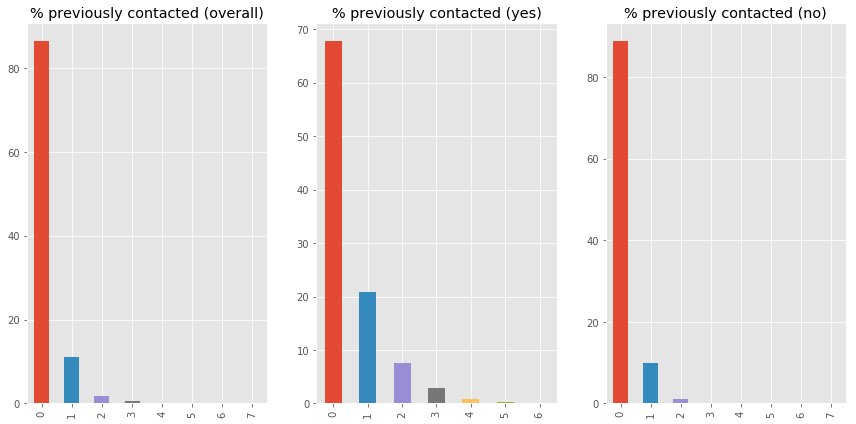

In [29]:
f = plt.figure(figsize=(12,6))

plt.subplot(131)
plt.title('% previously contacted (overall)')
previous_contact_overall = dataset["previous"].value_counts()
previous_overall = round(previous_contact_overall/(previous_contact_overall.sum())*100,1)
previous_overall.plot(kind = "bar")

plt.subplot(132)
plt.title('% previously contacted (yes)')
previous_contact_yes = dataset["previous"][dataset["y"] == "yes"].value_counts()
previous_yes = round(previous_contact_yes/(previous_contact_yes.sum())*100,1)
previous_yes.plot(kind = "bar")

plt.subplot(133)
plt.title('% previously contacted (no)')
previous_contact_no = dataset["previous"][dataset["y"] == "no"].value_counts()
previous_no = round(previous_contact_no/(previous_contact_no.sum())*100,1)
previous_no.plot(kind = "bar")

plt.tight_layout()

#### Difference of mean test on number of times contacted previously

In [30]:
previous_yes = dataset["previous"][dataset["y"] == "yes"]
previous_no = dataset["previous"][dataset["y"] == "no"]

rows_yes = previous_yes.shape[0]
rows_no = previous_no.shape[0]

mean_previous_yes = np.mean(previous_yes)
mean_previous_no = np.mean(previous_no)

std_dev_previous_yes = np.std(previous_yes)
std_dev_previous_no = np.std(previous_no)

std_error = (std_dev_previous_yes**2/rows_yes + std_dev_previous_no**2/rows_no)**0.5
Difference_mean = mean_previous_yes - mean_previous_no

Upper_bound_95_confidence_Interval = round(Difference_mean + 1.96*std_error, 3)
Lower_bound_95_confidence_Interval = round(Difference_mean - 1.96*std_error, 3)

print("The 95% confidence interval of the difference of means is [", Lower_bound_95_confidence_Interval, ", ", Upper_bound_95_confidence_Interval, "]")

The 95% confidence interval of the difference of means is [ 0.335 ,  0.385 ]


##### Analysis: 

The difference of mean test reveals that the number of times previously contacted is statistically significant at 95% confidence interval as the 95% confidence interval does not include 0. Also, from the above charts, people who were contacted more than once had a higher likelihood of converting.

#### Outcome of the previous marketing campaign (poutcome)

Text(0.5,1,'% poutcome (overall)')

Text(0.5,1,'% poutcome (yes)')

Text(0.5,1,'% poutcome (no)')

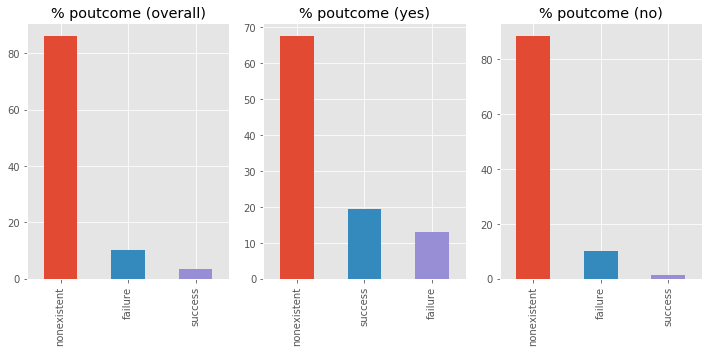

In [31]:
f = plt.figure(figsize=(10,5))

plt.subplot(131)
plt.title('% poutcome (overall)')
poutcome_past_overall = dataset["poutcome"].value_counts()
poutcome_overall = round(poutcome_past_overall/(poutcome_past_overall.sum())*100,1)
poutcome_overall.plot(kind = "bar")

plt.subplot(132)
plt.title('% poutcome (yes)')
poutcome_past_yes = dataset["poutcome"][dataset["y"] == "yes"].value_counts()
poutcome_yes = round(poutcome_past_yes/(poutcome_past_yes.sum())*100,1)
poutcome_yes.plot(kind = "bar")

plt.subplot(133)
plt.title('% poutcome (no)')
poutcome_past_no = dataset["poutcome"][dataset["y"] == "no"].value_counts()
poutcome_no = round(poutcome_past_no/(poutcome_past_no.sum())*100,1)
poutcome_no.plot(kind = "bar")

plt.tight_layout()

#### Chi square test on previous marketing campaigns (poutcome)

In [32]:
poutcome_yes = dataset["poutcome"][dataset["y"] == "yes"].value_counts()
poutcome_yes
poutcome_no = dataset["poutcome"][dataset["y"] == "no"].value_counts()
poutcome_no

poutcome_yes_arranged = [poutcome_yes["nonexistent"], poutcome_yes["success"], poutcome_yes["failure"]]
poutcome_no_arranged = [poutcome_no["nonexistent"], poutcome_no["success"], poutcome_no["failure"]]

obs = np.array([poutcome_yes_arranged, poutcome_no_arranged])
obs
chi2, p, dof, expected = stats.chi2_contingency(obs)
print("p value of chi-square test: ", p)

nonexistent    3141
success         894
failure         605
Name: poutcome, dtype: int64

nonexistent    32422
failure         3647
success          479
Name: poutcome, dtype: int64

array([[ 3141,   894,   605],
       [32422,   479,  3647]], dtype=int64)

p value of chi-square test:  0.0


##### Analysis: 

Success of previous marketing campaigns is statistically significant at 95% confidence interval from chi squeare test as p value is less than 5 %.

### Summary of variable analysis:


1) age (Difference of means is statistically significant at 95% confidence interval),

2) Job (Statistically signicant at 95% confidence level, proportionally higher response rate from job categories: Admin, Retired, Students),

3) marital status (statistically signicant at 95% confidence level, singles are proportionally more responsive),

4) education level (statistically significant at 95% confidence level, people with higher education; university.degree, high.school & professional.course responded more positively) 

5) default (to be dropped, not statistical significant at 95% confidence interval.)

6) housing (statistically signicant at 95% confidence level)

7) loan (to be dropped, not statistically significant at 95% confidence interval)

8) contact (statistically significant at 95% confidence level, higher conversion rates for cellular phone),

9) Months contacted (statistically significant at 95% confidence level, higher conversion rates in May, June, July and August)

10) Day of week: (statistically significant at 95% confidence level, higher conversion rates: Thursday, Tuesday and Wednesday)

11) Duration of call (to be dropped as variable cannot be know ahead of call)

12) campaign (It is not statistically significant at 95% confidence interval and so it can be dropped)

13) pdays (To be dropped as it is not statistically significant at 95% confidence interval)

14) previous (statistically significant at 95% confidence level, people who were contacted more than once had a higher likelihood of converting.)

15) poutcome (success in previous campaigns is statistically significant at 95% confidence level)

16) Economic Indicators: To be converted to levels (categorical variables) into models


### Feature Selection

#### Missing values

Missing values are present as "unknown". Lets check how many missibg values are there in each column of the dataframe.

In [33]:
dataset1 = dataset.astype(str)
print("Total rows in data set: ", dataset1.shape[0])  

print("Number of missing values in each column:")

for i in range(dataset1.shape[1]):
    a = dataset1.iloc[:,i][dataset1.iloc[:,i] == 'unknown'].shape[0]
    print(dataset1.columns.get_values()[i], ":", round(a/dataset.shape[0]*100, 1), "%")

Total rows in data set:  41188
Number of missing values in each column:
age : 0.0 %
job : 0.8 %
marital : 0.2 %
education : 4.2 %
default : 20.9 %
housing : 2.4 %
loan : 2.4 %
contact : 0.0 %
month : 0.0 %
day_of_week : 0.0 %
duration : 0.0 %
campaign : 0.0 %
pdays : 0.0 %
previous : 0.0 %
poutcome : 0.0 %
emp.var.rate : 0.0 %
cons.price.idx : 0.0 %
cons.conf.idx : 0.0 %
euribor3m : 0.0 %
nr.employed : 0.0 %
y : 0.0 %


#### Analysis: 
    
Most of the missing values are concentrated in the column "default". I have already stated above that the variable "default" will be dropped.

After "default" and "loan" (to be removed from dataset), the missing values are concentrated in 

'job': 0.8 % ,
'marital' : 0.2 % ,
'education' : 4.2 % ,
'housing' : 2.4 % .

##### Droping unecessary columns

In [34]:
dataset = dataset.drop(["default", "loan", "duration", "campaign", "pdays"], axis = "columns")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 16 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
housing           41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(2), object(9)
memory usage: 5.0+ MB


##### Dropping Missing data

In [35]:
dataset = dataset[dataset != 'unknown']
dataset = dataset.dropna()

dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38245 entries, 0 to 41187
Data columns (total 16 columns):
age               38245 non-null int64
job               38245 non-null object
marital           38245 non-null object
education         38245 non-null object
housing           38245 non-null object
contact           38245 non-null object
month             38245 non-null object
day_of_week       38245 non-null object
previous          38245 non-null int64
poutcome          38245 non-null object
emp.var.rate      38245 non-null float64
cons.price.idx    38245 non-null float64
cons.conf.idx     38245 non-null float64
euribor3m         38245 non-null float64
nr.employed       38245 non-null float64
y                 38245 non-null object
dtypes: float64(5), int64(2), object(9)
memory usage: 5.0+ MB


#### Analysis: 

Deleting all the missing data resulted in 38245 rows vs total 41188 rows in the original dataset, total of (41188 - 38245  =) 2943 rows; (7.1 %) of total data were removed from the original dataset.

##### Encoding the output/ predictor variable

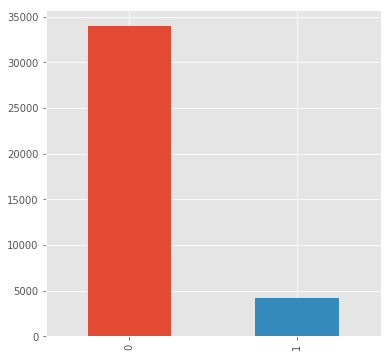

In [36]:
# Encoding the predictor variable to 1 for yes and 0 for no

mask = dataset["y"] == "yes"
dataset.loc[mask, "y"] = 1

mask = dataset["y"] == "no"
dataset.loc[mask, "y"] = 0

f = plt.figure(figsize=(6,6))
dataset["y"].value_counts().plot(kind = "bar")
dataset["y"] = dataset["y"].astype(int)

#####  Predictor variable for regression model

In [37]:
y = dataset["y"]
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int32

#####  Numerical variables

In [38]:
num_cols = ["age", "previous"]
dataset[num_cols].head(5)

,age,previous
0,56,0
1,57,0
2,37,0
3,40,0
4,56,0


#####  Categorical variables

In [39]:
cat_cols = ["job", "marital", "education", "housing", "contact", "month", "day_of_week", "poutcome", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]
dataset[cat_cols].head(5)

,job,marital,education,housing,contact,month,day_of_week,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,housemaid,married,basic.4y,no,telephone,may,mon,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,services,married,high.school,no,telephone,may,mon,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,services,married,high.school,yes,telephone,may,mon,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,admin.,married,basic.6y,no,telephone,may,mon,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,services,married,high.school,no,telephone,may,mon,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [40]:
for i in range(len(cat_cols)):
    dataset[cat_cols[i]] = dataset[cat_cols[i]].astype('category')
    
dataset[cat_cols].head(5)

,job,marital,education,housing,contact,month,day_of_week,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,housemaid,married,basic.4y,no,telephone,may,mon,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,services,married,high.school,no,telephone,may,mon,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,services,married,high.school,yes,telephone,may,mon,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,admin.,married,basic.6y,no,telephone,may,mon,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,services,married,high.school,no,telephone,may,mon,nonexistent,1.1,93.994,-36.4,4.857,5191.0


#####  Dummy variables

In [41]:
# Creating dummy variables for categorical types

dummies = pd.get_dummies(dataset[cat_cols])
#dummies.head(5)

# Combining dummy variables and numeric varianbles
dataset1 = dataset[num_cols]

dataset2 = pd.concat([dataset1, dummies, y], axis=1)
dataset = dataset2

dataset.shape
dataset.head(5)

(38245, 433)

,age,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,...,nr.employed_5008.7,nr.employed_5017.5,nr.employed_5023.5,nr.employed_5076.2,nr.employed_5099.1,nr.employed_5176.3,nr.employed_5191.0,nr.employed_5195.8,nr.employed_5228.1,y
0,56,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,57,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,37,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,40,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,56,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


#####  Input and output variables

In [42]:
X = dataset.drop("y", axis = "columns") # drops the predictor variable from the input dataset
y = dataset["y"]
X.head(5)

,age,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,...,nr.employed_4991.6,nr.employed_5008.7,nr.employed_5017.5,nr.employed_5023.5,nr.employed_5076.2,nr.employed_5099.1,nr.employed_5176.3,nr.employed_5191.0,nr.employed_5195.8,nr.employed_5228.1
0,56,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,57,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,37,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,40,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,56,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


#####  Training and test data sets

In [43]:
# Splitting the dataset into the training and test sets (80-20 split)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

X_test.head(5)

,age,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,...,nr.employed_4991.6,nr.employed_5008.7,nr.employed_5017.5,nr.employed_5023.5,nr.employed_5076.2,nr.employed_5099.1,nr.employed_5176.3,nr.employed_5191.0,nr.employed_5195.8,nr.employed_5228.1
24572,30,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
38529,58,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
14012,46,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2206,39,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
30011,46,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


#####  Feature scaling

In [44]:
# Scaling test set using the parameters from training set

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train[num_cols] = sc.fit_transform(X_train[num_cols])
X_test[num_cols] = sc.transform(X_test[num_cols])

X_train.head(5)

C:\Users\Rudrendu\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Rudrendu\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\Rudrendu\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/panda

,age,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,...,nr.employed_4991.6,nr.employed_5008.7,nr.employed_5017.5,nr.employed_5023.5,nr.employed_5076.2,nr.employed_5099.1,nr.employed_5176.3,nr.employed_5191.0,nr.employed_5195.8,nr.employed_5228.1
33117,-0.565088,1.688894,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
22412,0.407031,-0.347496,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
22278,-0.467876,-0.347496,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
22795,-0.467876,-0.347496,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9713,-0.079028,-0.347496,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


### Model fitting and accuracy metrics

#### Logistic regression model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Accuracy of model
             precision    recall  f1-score   support

          0       0.92      0.98      0.95      6813
          1       0.67      0.27      0.39       836

avg / total       0.89      0.91      0.89      7649

-- -- -- -- AUC curve on test dataset -- -- -- --


Text(0.5,1,'ROC curve - Logistic regression')

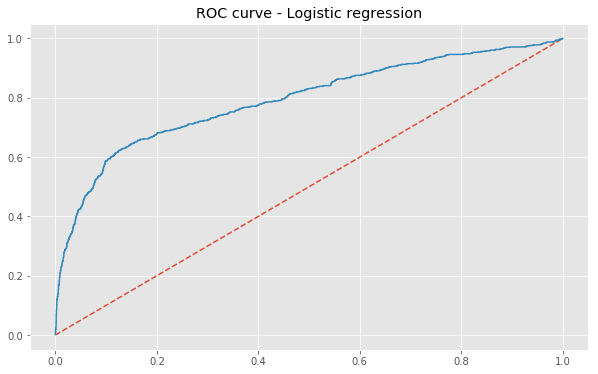

AUC : 79.0  %


In [45]:
# Fitting a Lasso model to the Training set

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(penalty='l1')
classifier.fit(X_train, y_train)

# Predicting the test set results

y_pred = classifier.predict(X_test)
y_pred = pd.DataFrame(y_pred)

from sklearn.metrics import classification_report
print("Accuracy of model")
print(classification_report(y_test, y_pred))

print("-- -- -- -- AUC curve on test dataset -- -- -- --")
from sklearn.metrics import roc_auc_score
probs1 = classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs1[:, 1]

# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(np.array(y_test), probs)
f = plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr)
# show the plot
plt.title('ROC curve - Logistic regression')
plt.show()

print("AUC :", round(roc_auc_score(y_test, probs)*100), " %")
# ---- Summary ----
auc_test_logreg = round(roc_auc_score(y_test, probs)*100)

classifier1 = classifier
y_pred1 = y_pred

#### Model Coefficients

In [46]:
Coeff = pd.DataFrame(classifier.coef_).T
Var = pd.DataFrame(X_train.columns)
coeff_logreg = pd.concat([Var, Coeff], axis=1)

coeff_logreg["variables"] = coeff_logreg.iloc[:,0]
coeff_logreg["coefficients"] = coeff_logreg.iloc[:,1]

coeff_logreg = coeff_logreg.iloc[:, [2,3]]
print("\n---- Total variables in model ----")
coeff_logreg.shape[0]
coeff_logreg.head(10)


coeff_logreg_filtered = coeff_logreg[coeff_logreg["coefficients"] != 0]
print("\n---- Variables with non-zero coefficients from regularization ----")
coeff_logreg_filtered.shape[0]
coeff_logreg.head(10)


---- Total variables in model ----


432

,variables,coefficients
0,age,-0.049934
1,previous,0.025804
2,job_admin.,0.035484
3,job_blue-collar,-0.077875
4,job_entrepreneur,0.000000
5,job_housemaid,-0.138098
6,job_management,0.037612
7,job_retired,0.197510
8,job_self-employed,-0.026918
9,job_services,-0.093819



---- Variables with non-zero coefficients from regularization ----


234

,variables,coefficients
0,age,-0.049934
1,previous,0.025804
2,job_admin.,0.035484
3,job_blue-collar,-0.077875
4,job_entrepreneur,0.000000
5,job_housemaid,-0.138098
6,job_management,0.037612
7,job_retired,0.197510
8,job_self-employed,-0.026918
9,job_services,-0.093819


##### Naive bayes classifier model

GaussianNB(priors=None)

Accuracy of model
             precision    recall  f1-score   support

          0       0.94      0.91      0.93      6813
          1       0.42      0.51      0.46       836

avg / total       0.88      0.87      0.88      7649

-- -- -- -- AUC curve on test dataset -- -- -- --


Text(0.5,1,'ROC curve - Naive Bayes')

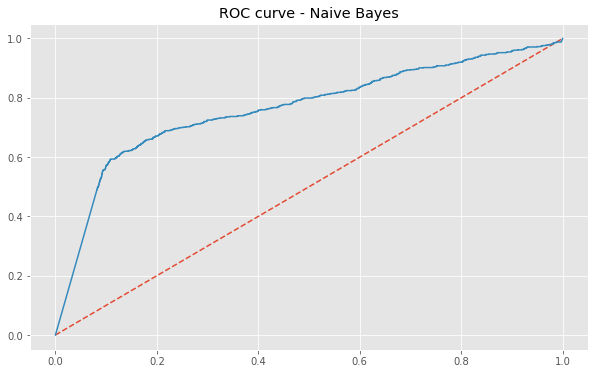

AUC : 76.0  %


In [47]:
# Naive bayes classifier model

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()

classifier.fit(X_train, y_train)

# Predicting the test set results

y_pred = classifier.predict(X_test)
y_pred = pd.DataFrame(y_pred)

from sklearn.metrics import classification_report
print("Accuracy of model")
print(classification_report(y_test, y_pred))

print("-- -- -- -- AUC curve on test dataset -- -- -- --")
from sklearn.metrics import roc_auc_score
probs1 = classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs1[:, 1]
# calculate roc curve
fpr, tpr, thresholds = roc_curve(np.array(y_test), probs)
f = plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC curve - Naive Bayes')

# plot the roc curve for the model
plt.plot(fpr, tpr)

# show the plot
plt.show()
print("AUC :", round(roc_auc_score(y_test, probs)*100), " %")

# ---- Summary ----
auc_test_bayes = round(roc_auc_score(y_test, probs)*100)

##### Decision tree classifier model

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

Accuracy of model
             precision    recall  f1-score   support

          0       0.92      0.92      0.92      6813
          1       0.32      0.33      0.32       836

avg / total       0.85      0.85      0.85      7649

-- -- -- -- AUC curve on test dataset -- -- -- --


Text(0.5,1,'ROC curve - Decision tree')

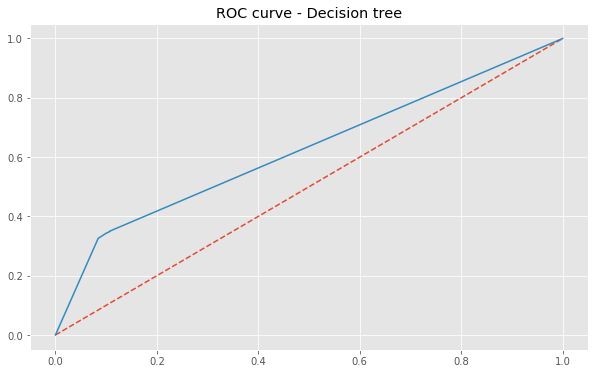

AUC : 62.0  %


In [48]:
# Fitting a decision tree classifier to the training set

from sklearn.tree import DecisionTreeClassifier 
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the test set results

y_pred = classifier.predict(X_test)
y_pred = pd.DataFrame(y_pred)

from sklearn.metrics import classification_report
print("Accuracy of model")
print(classification_report(y_test, y_pred))

print("-- -- -- -- AUC curve on test dataset -- -- -- --")
from sklearn.metrics import roc_auc_score
probs1 = classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs1[:, 1]
# calculate roc curve
fpr, tpr, thresholds = roc_curve(np.array(y_test), probs)
f = plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')

plt.title('ROC curve - Decision tree')
# plot the roc curve for the model
plt.plot(fpr, tpr)
# show the plot
plt.show()
print("AUC :", round(roc_auc_score(y_test, probs)*100), " %")

# ---- Summary ----
auc_test_dectree = round(roc_auc_score(y_test, probs)*100)

##### Random forest classifier model

C:\Users\Rudrendu\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

Accuracy of model
             precision    recall  f1-score   support

          0       0.92      0.95      0.93      6813
          1       0.44      0.29      0.35       836

avg / total       0.86      0.88      0.87      7649

-- -- -- -- AUC curve on test dataset -- -- -- --


Text(0.5,1,'ROC curve - Random Forest')

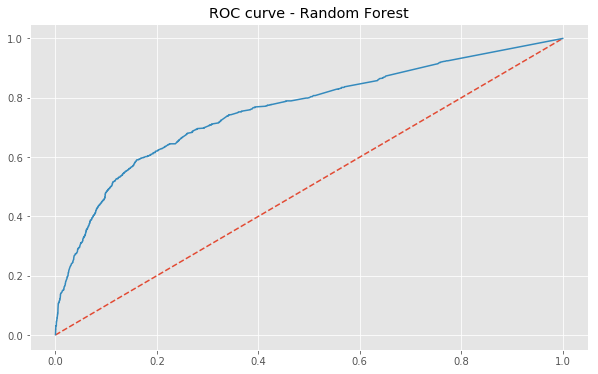

AUC : 76.0  %


In [49]:
# Fitting a random forest classifier to the training set

from sklearn.ensemble import RandomForestClassifier 
classifier = RandomForestClassifier(n_estimators = 200, random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the test set results

y_pred = classifier.predict(X_test)
y_pred = pd.DataFrame(y_pred)

from sklearn.metrics import classification_report
print("Accuracy of model")
print(classification_report(y_test, y_pred))

print("-- -- -- -- AUC curve on test dataset -- -- -- --")
from sklearn.metrics import roc_auc_score
probs1 = classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs1[:, 1]
# calculate roc curve
fpr, tpr, thresholds = roc_curve(np.array(y_test), probs)
f = plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr)
plt.title('ROC curve - Random Forest')

# show the plot
plt.show()
print("AUC :", round(roc_auc_score(y_test, probs)*100), " %")

# ---- Summary ----
auc_test_randfor = round(roc_auc_score(y_test, probs)*100)

#### Variable Importance from Random Forest

In [50]:
# Extract feature importances
fi = pd.DataFrame({'feature': list(X_train),
                   'importance': classifier.feature_importances_}).\
                    sort_values('importance', ascending = False)

# Display
print("Total variables in model: ",fi.shape[0])
fi.head(10)

a1 = fi["importance"].sum()
a3 = 0
fi_mod = 0

print("-------- Applying 80-20 rule to identify the Top 20% of variables which explain 80% of variation --------") 
for i in range(fi.shape[0]): 
    a2 = fi.iloc[i,1]
    a3 = a3 + a2
    print(fi.iloc[i,0])
    if a3 > 0.8*fi["importance"].sum():
        b = i
        print("\n Total variables that explain 80% of variation: ", b)
        break

print("\n", round((b/fi.shape[0])*100, 1), "% of the variables explain 80% of total variation in output")

Total variables in model:  432


,feature,importance
0,age,0.248123
44,poutcome_success,0.029379
24,housing_yes,0.023307
23,housing_no,0.023251
1,previous,0.022723
2,job_admin.,0.020734
14,marital_married,0.019991
22,education_university.degree,0.019599
19,education_high.school,0.019076
15,marital_single,0.017805


-------- Applying 80-20 rule to identify the Top 20% of variables which explain 80% of variation --------
age
poutcome_success
housing_yes
housing_no
previous
job_admin.
marital_married
education_university.degree
education_high.school
marital_single
job_technician
education_professional.course
poutcome_failure
day_of_week_mon
job_blue-collar
education_basic.9y
day_of_week_wed
day_of_week_tue
day_of_week_thu
marital_divorced
day_of_week_fri
poutcome_nonexistent
job_management
contact_telephone
contact_cellular
job_services
education_basic.4y
job_retired
nr.employed_5008.7
education_basic.6y
job_self-employed
month_mar
emp.var.rate_-1.7
nr.employed_4991.6
nr.employed_5076.2
emp.var.rate_-3.4
emp.var.rate_-2.9
job_entrepreneur
job_unemployed
nr.employed_5017.5
job_student
month_oct
job_housemaid
nr.employed_4963.6
euribor3m_1.365
emp.var.rate_-1.1
nr.employed_5228.1
emp.var.rate_1.4
month_may
cons.conf.idx_-46.2
cons.price.idx_94.215
nr.employed_5099.1
euribor3m_4.962
cons.price.idx_92.9

## Principal Component Analysis

In [51]:
# Checking the variance explained by each principal component

from sklearn.decomposition import PCA
pca = PCA(n_components = None)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print("Variation explained by each principal component")
list(explained_variance)[0:10]
print("\nApplying 80-20 rule to identify the top 20% principal components which explain 80% of variation\n")  

i = 34
pca_var_explained = round(sum(list(explained_variance)[0:i])*100, 1)

print("Variation explained by the top", i, "principal components is ", pca_var_explained, " %")

Variation explained by each principal component


[0.12865224608378886,
 0.1117004190346826,
 0.10013626213961732,
 0.06266099381580197,
 0.05040060249692657,
 0.0436201997455702,
 0.042634779834765914,
 0.04099632845445302,
 0.033042479156901755,
 0.02589232052896954]


Applying 80-20 rule to identify the top 20% principal components which explain 80% of variation

Variation explained by the top 34 principal components is  90.3  %


#### Analysis: I shall choose the top 34 principal components.

The top 34 principal components explain 90 % variance in the dataset. Beyond the top 2, the marginial gain in variance for adding each principal componenet is significantly reduced.

Applying principal component analysis, achieves variable reduction as only 34 principal components can explain 90 % of the variation explained by 426 variables in original training dataset.

### Selecting the top 34 principal components

In [54]:
# Principal component analysis to take the 34 top components

i = 34
from sklearn.decomposition import PCA
pca = PCA(n_components = i)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

#### KNN Model (with PCA)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=50, p=2,
           weights='uniform')

Accuracy of model
             precision    recall  f1-score   support

          0       0.91      0.99      0.95      6813
          1       0.64      0.19      0.29       836

avg / total       0.88      0.90      0.87      7649

-- -- -- -- AUC curve on test dataset -- -- -- --


Text(0.5,1,'ROC curve - KNN')

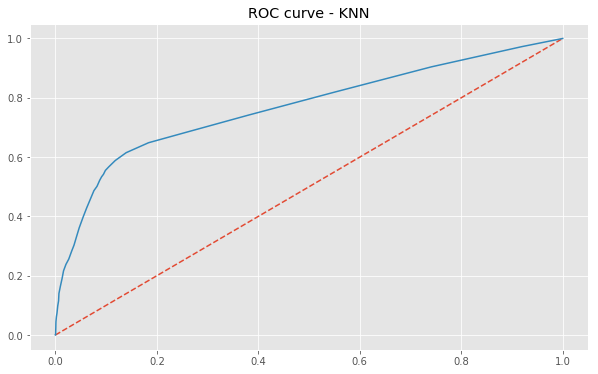

AUC : 77.0  %


In [55]:
# Fitting a KNN model on training set with PCA transformation

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=50)
classifier.fit(X_train_pca, y_train) # training set with pca transformation

# Predicting the test set results

y_pred = classifier.predict(X_test_pca) # training set with pca transformation
y_pred = pd.DataFrame(y_pred)

from sklearn.metrics import classification_report
print("Accuracy of model")
print(classification_report(y_test, y_pred))

print("-- -- -- -- AUC curve on test dataset -- -- -- --")
from sklearn.metrics import roc_auc_score
probs1 = classifier.predict_proba(X_test_pca)  # training set with pca transformation
# keep probabilities for the positive outcome only
probs = probs1[:, 1]
# calculate roc curve
fpr, tpr, thresholds = roc_curve(np.array(y_test), probs)
f = plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')

plt.title('ROC curve - KNN')
# plot the roc curve for the model
plt.plot(fpr, tpr)
# show the plot
plt.show()
print("AUC :", round(roc_auc_score(y_test, probs)*100), " %")

# ---- Summary ----
auc_test_knn = round(roc_auc_score(y_test, probs)*100)

#### Gradient boosted tree model (with PCA)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

Accuracy of model
             precision    recall  f1-score   support

          0       0.91      0.98      0.95      6813
          1       0.63      0.21      0.32       836

avg / total       0.88      0.90      0.88      7649

-- -- -- -- AUC curve on test dataset -- -- -- --


Text(0.5,1,'ROC curve - Gradient boosted tree')

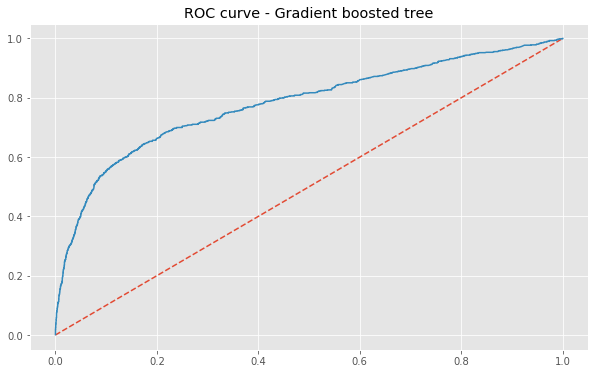

AUC : 78.0  %


In [56]:
# Fitting a Gradient boosted tree model on training set with PCA transformation

from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier(n_estimators = 100)
classifier.fit(X_train_pca, y_train) # training set with pca transformation

# Predicting the test set results

y_pred = classifier.predict(X_test_pca) # training set with pca transformation
y_pred = pd.DataFrame(y_pred)

from sklearn.metrics import classification_report
print("Accuracy of model")
print(classification_report(y_test, y_pred))

print("-- -- -- -- AUC curve on test dataset -- -- -- --")
from sklearn.metrics import roc_auc_score
probs1 = classifier.predict_proba(X_test_pca)  # training set with pca transformation
# keep probabilities for the positive outcome only
probs = probs1[:, 1]
# calculate roc curve
fpr, tpr, thresholds = roc_curve(np.array(y_test), probs)
f = plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')

plt.title('ROC curve - Gradient boosted tree')
# plot the roc curve for the model
plt.plot(fpr, tpr)
# show the plot
plt.show()
print("AUC :", round(roc_auc_score(y_test, probs)*100), " %")

# ---- Summary ----
auc_test_boosted_tree = round(roc_auc_score(y_test, probs)*100)

#### SVM Classifier (with PCA)

In [ ]:
# Fitting a SVM classifier model on training set with PCA transformation

from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', probability = True)
classifier.fit(X_train_pca, y_train) # training set with pca transformation

# Predicting the test set results

y_pred = classifier.predict(X_test_pca) # training set with pca transformation
y_pred = pd.DataFrame(y_pred)

from sklearn.metrics import classification_report
print("Accuracy of model")
print(classification_report(y_test, y_pred))

print("-- -- -- -- AUC curve on test dataset -- -- -- --")
from sklearn.metrics import roc_auc_score
probs1 = classifier.predict_proba(X_test_pca)  # training set with pca transformation
# keep probabilities for the positive outcome only
probs = probs1[:, 1]
# calculate roc curve
fpr, tpr, thresholds = roc_curve(np.array(y_test), probs)
f = plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')

plt.title('ROC curve - SVM classifier')
# plot the roc curve for the model
plt.plot(fpr, tpr)
# show the plot
plt.show()
print("AUC :", round(roc_auc_score(y_test, probs)*100), " %")

# ---- Summary ----
auc_test_svm_classifier = round(roc_auc_score(y_test, probs)*100)

#### Summary metrics for all models 

In [ ]:
d1 = {'logistic regression': [auc_test_logreg], 'boosted tree (pca)': [auc_test_boosted_tree], 'knn (pca)': [auc_test_knn], 'random forest': [auc_test_randfor], 'bayes': [auc_test_bayes ], 'svm classifier (pca)': [auc_test_svm_classifier], 'decision tree': [auc_test_dectree]}

AUC_model_test1 = pd.DataFrame(d1)
AUC_test_set = AUC_model_test1
AUC_test_set = AUC_test_set.T
AUC_test_set.columns = ["%_AUC_score"]
AUC_test_set

AUC_test_set.plot(kind = "bar")
plt.title('% AUC scores test_set')
plt.xlabel('ml models')
plt.ylabel('AUC %')
plt.ylim(60,80)
plt.show()

####  Model Selection

Linear logistic regression gives the best results, based on the test set AUC score.

#####  Response predicted by best model

In [ ]:
y_pred1 = classifier1.predict_proba(X_test)[:,1]
y_pred1 = pd.DataFrame(y_pred1)
y_pred1.columns = ['Rank Scored probabilities']
y_pred1 = y_pred1.sort_values('Rank Scored probabilities', ascending = False)
y_pred1.reset_index(drop=True, inplace=True)

y_pred1.plot(kind = "line")
plt.title('Lift chart - test set')
plt.xlabel('people')
plt.ylabel('probability')

In [ ]:
top_segment = 1500 # from lift curve shown above
new_list = y_pred1.iloc[top_segment]
response_top_segment = y_pred1.iloc[0:top_segment].mean()
response_top_segment = round(np.array(response_top_segment)[0],3)
print("Average response rate for customers in the new list:", response_top_segment)

## Business Application

### Case I: Campaign by mailing everyone on list

#### Baseline performance

Mailing to everyone in list without using model

Average response rate from customers in test set list is 10.93 %

Total customers in test set list  = 7,649

Expected rev from customers for every positive response is $ 10

Cost of each mailing is $ 2

In [ ]:
test_set_list = y_test.shape[0]
rev = 10
cost = 2
print("Total size of test set:", test_set_list)
response_rate = round(y_test.mean(), 4)

print("\nAverage response rate of people in test set:", response_rate)
total_campaign_profit = round((response_rate * rev - cost)*test_set_list)
roi_test_list = round(total_campaign_profit/(cost*test_set_list)*100)

print ("\n---- Mailing everyone in test set list ----\n")
print("Total campaign profit: $", round(total_campaign_profit)) 
print("ROI:", roi_test_list, "%")

Marketing to every person on the list results in a loss of almost $ 7k and a ROI of negative 45 %

### Case II: Campaign based on model

#### Model performance 

#### Mailing only to people in target list:

Average response rate in the top customer segment is 35.8 % (Applying elbow method on graph shown above)

Total customers in list  = 1500 (Obtained from graph shown above)

Expected revenue from customers for every positive response is $ 10

Cost of each mailing is $ 3

In [ ]:
new_list = top_segment
response_rate = response_top_segment

total_campaign_profit = round((response_rate * rev - cost)*new_list)
roi_target_list = round(total_campaign_profit/(cost*new_list)*100)

print ("\nMarketing only to targeted list of people suggested by model:")
print("\n Total campaign profit: $", total_campaign_profit)
print("\n ROI %:", roi_target_list)

Marketing to people on targetted list results in a profit of $ 2,374 with a ROI of 79 %.

Using the model for campaiging improves the campaign ROI to 79 % from -45 % (baseline).

Marketing to new list of people with high probability of conversion identified by the machine learning model, improves response rate to 36 % (best model), 3.5X the overall average response rate of 11 % (baseline) and improves ROI from -45 % (baseline) to 79 % (best model).